<a href="https://colab.research.google.com/github/JuanCReyes1/Neurocomputing/blob/master/PoincareSections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autonomous Differential Equations and Numerical Integration

## Juan C. Reyes
## Feb 4. 2020
## General Relativity, Cosmology, Dynamical Systems
## Dalhousie University 

# Numerical Integration and Poincaré Sections

In [0]:
#Install necessary package for making GIF's
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.8).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


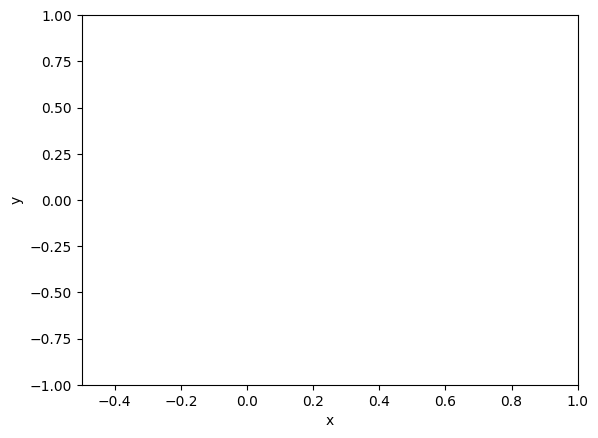

In [0]:
#@title 

import matplotlib.pyplot as plt
from sympy import sqrt
import numpy as np
from scipy.integrate import odeint

xmin, xmax = -1, 1
ymin, ymax = -1, 1

def dx_dt(x, t):
    return [-x[1] - x[0] * sqrt(x[0]**2 + x[1]**2),
            x[0] - x[1] * sqrt(x[0]**2 + x[1]**2)]

# Phase portrait
t = np.linspace(0, 16*np.pi, 10000)

ics = np.array([[1,0]])

#integrate equations for varying initial conditions
for i in ics:
  
  xs1 = odeint(dx_dt, i, t)
  

XS1 = xs1[:,0]
XS2 = xs1[:,1]

fig = plt.figure()

ax = plt.axes(xlim=(-0.5, 1), ylim=(-1, 1))
ax.set_xlabel("x")
ax.set_ylabel("y")

line, = ax.plot([], [], lw=1.5) #initialize line elements

def init():
    line.set_data([], [])
    return line,
def animate(i):
    #line.set_data(t[0:40*(i)],V[0:40*(i)])
    line.set_data(XS1[0:60*i],XS2[0:60*i])
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=110, interval=1, blit=False) ; 


anim.save('poincaresection.gif', writer='imagemagick') ; 



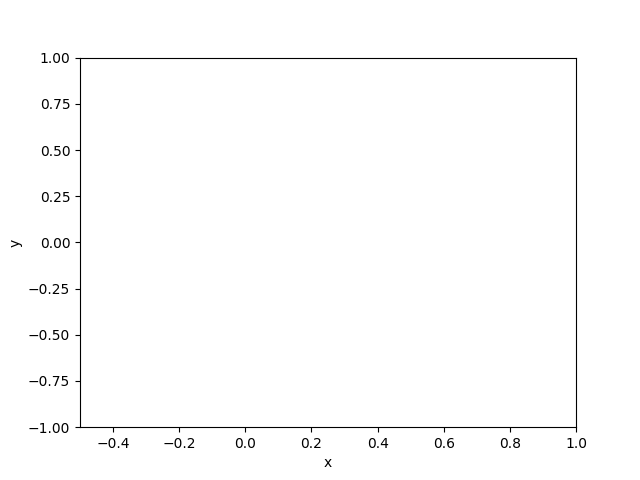

In [0]:
from IPython.display import Image
with open('poincaresection.gif','rb') as file:
    display(Image(file.read()))

The Poincaré retunrns: 
r0 = 1.0
r1 = 0.13730247618333372
r2 = 0.07371163982459514
r3 = 0.05037894644425656
r4 = 0.038266178113978165
r5 = 0.030849052029229055
r6 = 0.025840414374083687
r7 = 0.022231002965186247
r8 = 0.01950634323887854


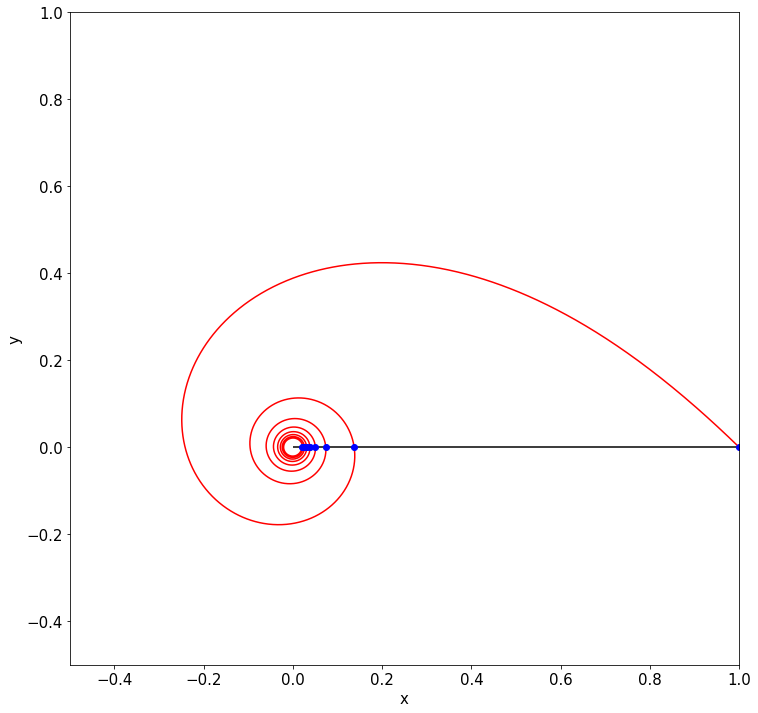

In [4]:
import matplotlib.pyplot as plt
from sympy import sqrt
import numpy as np
from scipy.integrate import odeint

xmin, xmax = -0.5, 1
ymin, ymax = -0.5, 1

def dx_dt(x, t):
    return [-x[1] - x[0] * sqrt(x[0]**2 + x[1]**2),
            x[0] - x[1] * sqrt(x[0]**2 + x[1]**2)]

# Phase portrait
t = np.linspace(0, 16*np.pi, 10000)

#ics = np.array([[1,1],[2,2],[1,0],[-1,0],[-1,-1]])
ics = np.array([[1,0]])
plt.figure(figsize=(12,12))
#integrate equations for varying initial conditions
for i in ics:
  
  xs = odeint(dx_dt, i, t)

  plt.plot(xs[:, 0], xs[:, 1], 'r-')

plt.hlines(0,0,1,colors='k') #plot poincare section x:[0,1]

##Plotting
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
#Set phase space limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

# Calculate Poincare first eight returns on x-axis.
t = np.linspace(0, 9*2*np.pi, 900000)
xs = odeint(dx_dt, [1, 0], t)
print("The Poincaré retunrns: ")

for i in range(9):

    print('r{} = {}'.format(i, xs[100000*i, 0]))
    plt.plot(xs[100000*i, 0],0,'bo')

plt.show()


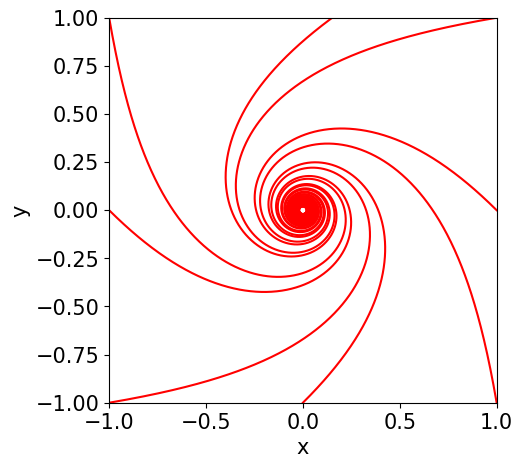

In [0]:
#@title Multiple Initial Conditions
# Program 09a: Poincare first return map.
# See Figure 9.2.

import matplotlib.pyplot as plt
from sympy import sqrt
import numpy as np
from scipy.integrate import odeint

#Phase space 
xmin, xmax = -1, 1
ymin, ymax = -1, 1

#Autonomous differential equations
def dx_dt(x, t):
    return [-x[1] - x[0] * sqrt(x[0]**2 + x[1]**2),
            x[0] - x[1] * sqrt(x[0]**2 + x[1]**2)]

# time range with 10000 steps
t = np.linspace(0, 16*np.pi, 10000)
#Initial conditions
ics = np.array([[1,1],[2,2],[1,0],[-1,0],[-1,-1],[-1,1],[1,-1],[0,-1]]) #various initial conditions
#ics = np.array([[1,0]]) #one initial condition

###Plotting###

#Create figure object to store our picture, of size (10,10)
plt.figure(figsize=(5,5))
tempone = []
temptwo =[]
#integrate equations for the chosen initial conditions
for i in ics:
  #Obtain time series data of our numerically integrated differential equations
  xs = odeint(dx_dt, i, t)
  tempone = np.append(tempone,xs[:,0])
  temptwo = np.append(temptwo,xs[:,1])
  
  #Plot phase space of each time series variable vs the other
  plt.plot(xs[:, 0], xs[:, 1], 'r-')

#Now plot our poincare section
#plt.hlines(0,0,1,colors='k') 


#Define axes labels a
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)

#Define plot ranges
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax);

plt.show()


# Part 2: Limit Cycles

Let's take a look at the behaviour of the following dynamical system:

$\dot{x} = -y + x(1 -\sqrt{x^{2} + y^{2} })$

$\dot{y} = x + y(1 -\sqrt{x^{2} + y^{2} })$

By converting to polar coordinates we obtain:

$\dot{r} = r(1-r)$

$\dot{\theta} = 1 $

This system can be solved since both differential equations are separable.

The solutions:

$r(t) = \frac{1}{1+ C e^{-t}}$

$\theta(t) = t + \theta_{0}$

Where $C$ and $\theta_{0}$ are constants. The trajectories will flow around the origin with a period of $2\pi$.

## Example Solutions:

### Initial condition outside of the unit circle:

Given $r_{0} = 2$, yields the solutions:


$r(t) = \frac{1}{1-\frac{1}{2}e^{-t}}$ , $\theta(t) = t$ gives a return map:

$r_{n} = \frac{1}{1- \frac{1}{2}e^{-2n\pi}}$, where $n$ $\in$ $\mathbb{N}$.

### Initial condition inside of the unit circle:

Given $r_{0} = \frac{1}{2}$, yields the solutions:

$r(t) = \frac{1}{1+e^{-t}}$ , $\theta(t) = t$ gives a return map:

$r_{n} = \frac{1}{1+e^{-2n\pi}}$, where $n$ $\in$ $\mathbb{N}$.






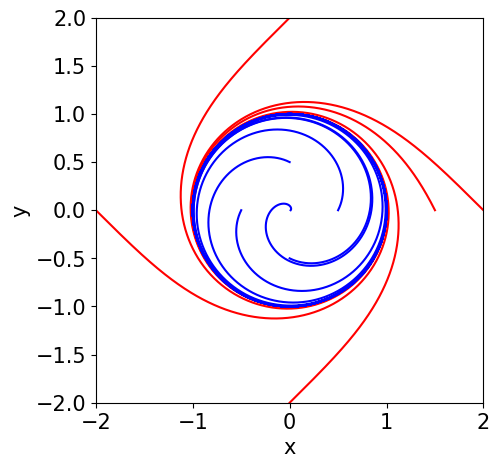

In [0]:
#@title Limit Cycle Phase Portrait with IC's inside and outside the unit circle.


import matplotlib.pyplot as plt
from sympy import sqrt
import numpy as np
from scipy.integrate import odeint

xmin, xmax = -2, 2
ymin, ymax = -2, 2

def dx_dt(x, t):
    return [-x[1] + x[0] *(1.0 - sqrt(x[0]**2 + x[1]**2)) ,
            x[0] + x[1] * (1.0 - sqrt(x[0]**2 + x[1]**2))]

# Phase portrait
t = np.linspace(0, 16*np.pi, 10000)

#ics = np.array([[1,1],[2,2],[1,0],[-1,0],[-1,-1]])
#ics = np.array([[1,0]])
icsout = np.array([[1,0],[2,0],[0,2],[-2,0],[0,-2],[1.5,0]])
icsin = np.array([[0.5,0],[-0.5,0],[0,0.5],[0,-0.5],[0.01,0]])
plt.figure(figsize=(5,5))
#integrate equations for varying initial conditions
for i in icsout:
  
  xs = odeint(dx_dt, i, t)
  plt.plot(xs[:, 0], xs[:, 1], 'r-')
for i in icsin:
  xs = odeint(dx_dt, i, t)
  plt.plot(xs[:, 0], xs[:, 1], 'b-')


#plt.hlines(0,0,1,colors='k') #plot poincare section x:[0,1]
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(xmin, xmax);
plt.ylim(ymin, ymax);

plt.show()


As we can see in both cases $r_{n} \rightarrow 1$ as $n \rightarrow \infty$. The origin is an unstable focus and solutions starting on the unit circle stay on the unit circle. This is what we call a limit cycle $\Gamma$ of radius $r = 1$ centered at the origin. Plenty of analysis should follow this...